# Pre-Processing

We need to create a dataframe that tracks the results for each area and number of bedrooms.
So we need to solve the problem of not having a shape file for suburb boundaries. To fix this I will track by SA2 zone instead. So I will average over the zone for each number of bedrooms.

In [2]:
import sys
import os
repo_path = os.path.abspath('../')
sys.path.append(repo_path)
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import scripts.addSA2 as addSA2

/home/dylan/.local/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


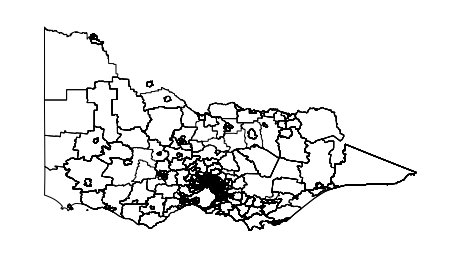

In [3]:
df = pd.read_csv(f"../data/curated/outlier_removed_data.csv")
df = addSA2.addSA2(df, use_postcode = False)
df = df.loc[df["SA2"] != 0]
ax = gplt.polyplot(df)

In [10]:
df.dtypes

Unnamed: 0                              int64
url                                    object
postcode                              float64
weekly_rent                           float64
bond                                  float64
num_beds                              float64
num_baths                             float64
num_parking                           float64
internal_area_m^2                     float64
land_area_m^2                         float64
last_sold                             float64
other_sold_n_bed_suburn               float64
neighbourhood_under_20                float64
neighbourhood_20_to_39                float64
neighbourhood_40_to_59                float64
neighbourhood_above_60                float64
neighbourhood_long_term_residents     float64
neighbourhood_owners                  float64
neighbourhood_renter                  float64
neighbourhood_family                  float64
neighbourhood_single                  float64
performance_median_price          

In [46]:
df["sold_per_population"] = df["performance_sold_this_year"]/df["demographic_population"]
features = ["performance_auction_clearance", "performance_avg_days_on_market", "sold_per_population", "num_beds", "SA2"]
df_SA2 = df[features].groupby(by=["num_beds", "SA2"])

In [47]:
df_SA2 = df_SA2.mean().dropna().reset_index()

In [48]:
df_SA2

,num_beds,SA2,performance_auction_clearance,performance_avg_days_on_market,sold_per_population
0,1.0,206011106.0,0.710000,66.000000,6.818182
1,1.0,206011107.0,0.306800,71.461538,4.206731
2,1.0,206011495.0,0.448667,78.133333,4.615657
3,1.0,206011496.0,0.430000,80.600000,4.275397
4,1.0,206021110.0,0.800000,83.000000,5.666667
...,...,...,...,...,...
888,5.0,213051468.0,0.430000,98.000000,1.200000
889,5.0,213051580.0,0.390000,49.000000,2.673469
890,5.0,213051581.0,0.390000,49.000000,2.673469
891,5.0,214011371.0,0.800000,29.000000,0.805556


In [49]:
approvals = pd.read_csv("../data/raw/datasource-AU_Govt_ABS-UoM_AURIN_DB_3 abs_building_approvals_sa2_2020_21.csv")
approvals = approvals[["sa2_code", "new_houses_no", "new_other_residential_building_no", "value_of_new_houses_000", "value_of_new_other_residential_building_000"]]

In [50]:
df_SA2 = df_SA2.join(approvals.set_index("sa2_code"), on = "SA2")

In [51]:
df_SA2

,num_beds,SA2,performance_auction_clearance,performance_avg_days_on_market,sold_per_population,new_houses_no,new_other_residential_building_no,value_of_new_houses_000,value_of_new_other_residential_building_000
0,1.0,206011106.0,0.710000,66.000000,6.818182,3,85,1513.0,29269.0
1,1.0,206011107.0,0.306800,71.461538,4.206731,16,23,7273.0,7683.0
2,1.0,206011495.0,0.448667,78.133333,4.615657,8,132,4252.8,32315.5
3,1.0,206011496.0,0.430000,80.600000,4.275397,5,217,3956.6,82216.8
4,1.0,206021110.0,0.800000,83.000000,5.666667,9,41,8117.0,21051.1
...,...,...,...,...,...,...,...,...,...
888,5.0,213051468.0,0.430000,98.000000,1.200000,1270,86,364461.4,17915.8
889,5.0,213051580.0,0.390000,49.000000,2.673469,5,2,2335.3,604.5
890,5.0,213051581.0,0.390000,49.000000,2.673469,24,3,8251.6,1100.0
891,5.0,214011371.0,0.800000,29.000000,0.805556,23,67,11072.4,18037.7
